In [ ]:
# picking out the stocks to be traded
# apply portfolio balancing using Global Efficient Frontier

In [20]:
from empyrial import (
    empyrial,
    Engine,
) # importing empyrial for portfolio analysis, and backtesting
from datetime import (
    datetime,
    timedelta,
) # importing datetime for controlling period of analysis
from pandas_datareader import data as web
import yfinance as yfin
yfin.pdr_override()

In [22]:
BENCHMARK='SPY' # Using SPY as the benchmark for comparison
BALANCE=10000 # start with a balance of $10,000
PORTFOLIO=[
    'MSFT',
    'NVDA',
    'META',
    'BAC',
    'AXP',
    'MCD',
    'KO',
    'AMZN',
    'WMT',
    'CVX',
    'YUM',
] # my portfolio, consists of tech, finance, retail, oil, and FMCG

# get stock close price for the past 7 days to calculate how many shares to own
PORTFOLIO_DATA=[
    web.DataReader(
        stock,
        start=str(datetime.now()-timedelta(days=7))[:10],
        end=str(datetime.now())[:10]
    ).reset_index()[['Date','Close']] for stock in PORTFOLIO
]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Rebalance schedule: 
      2021-01-05 10:00:00  2021-02-04 20:00:00  2021-03-07 06:00:00  \
MSFT              0.16353              0.45874              0.09744   
NVDA              0.00000              0.00000              0.00000   
META              0.00000              0.00000              0.00000   
BAC               0.49225              0.39369              0.40154   
AXP               0.00000              0.00000              0.22579   
MCD               0.11745              0.01121              0.00000   
KO                0.00000              0.00000              0.00000   
AMZN              0.18957              0.13637              0.00000   
WMT               0.00000              0.00000              0.00000   
CVX               0.00000              0.00000              0.27522   
YUM               0.03719              0.00000              0.00000   

      2021-04-06 16:00:00  2021-05-07 02:00:00  2021-06-06 12:00:00  \
MSFT              0.14220              0.10452         

,Backtest
,
Annual return,58.56%
Cumulative return,273.24%
Annual volatility,21.34 %
Winning day ratio,55.56%
Sharpe ratio,2.27
Calmar ratio,2.7
Information ratio,0.01
Stability,0.96
Max Drawdown,-13.11 %


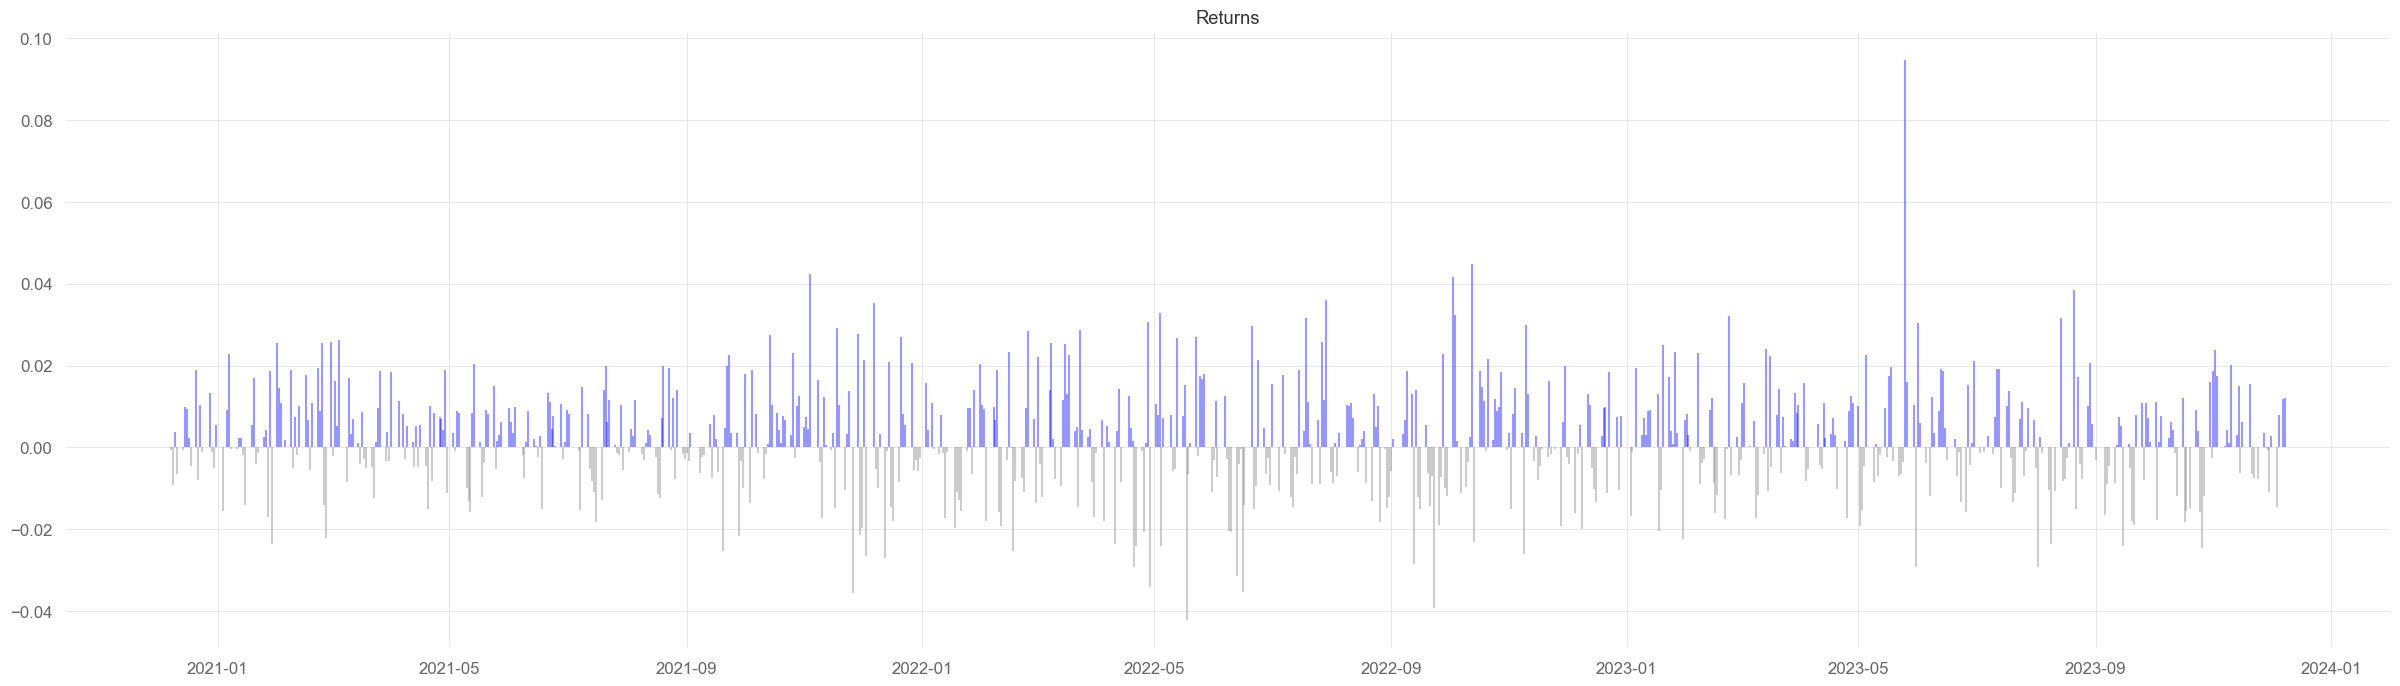

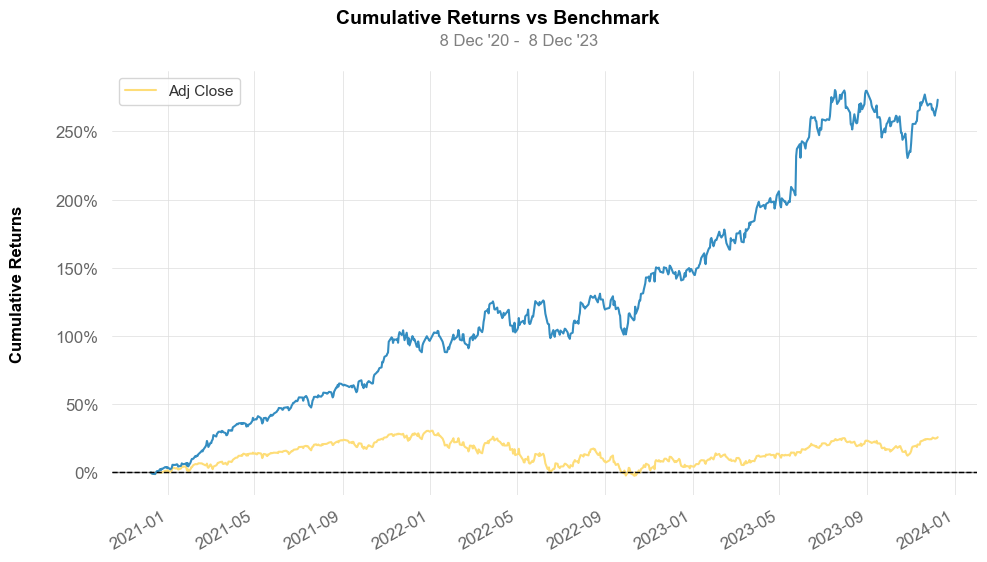

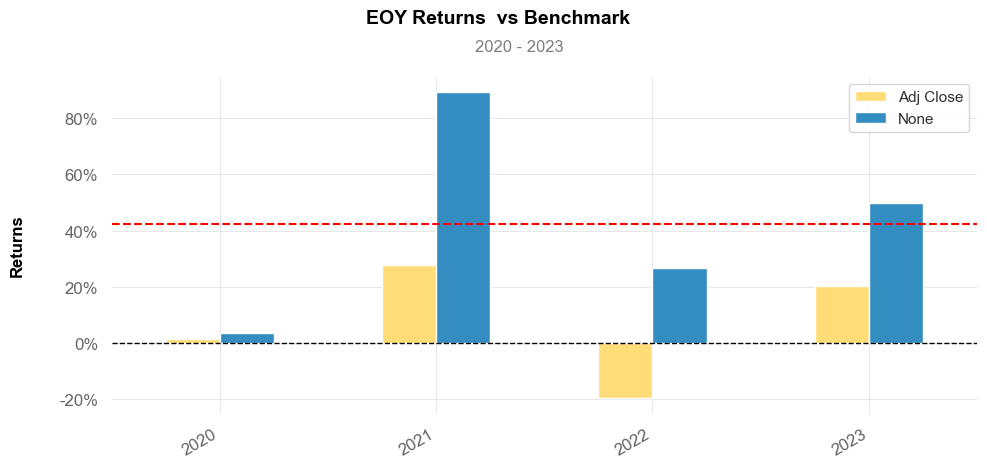

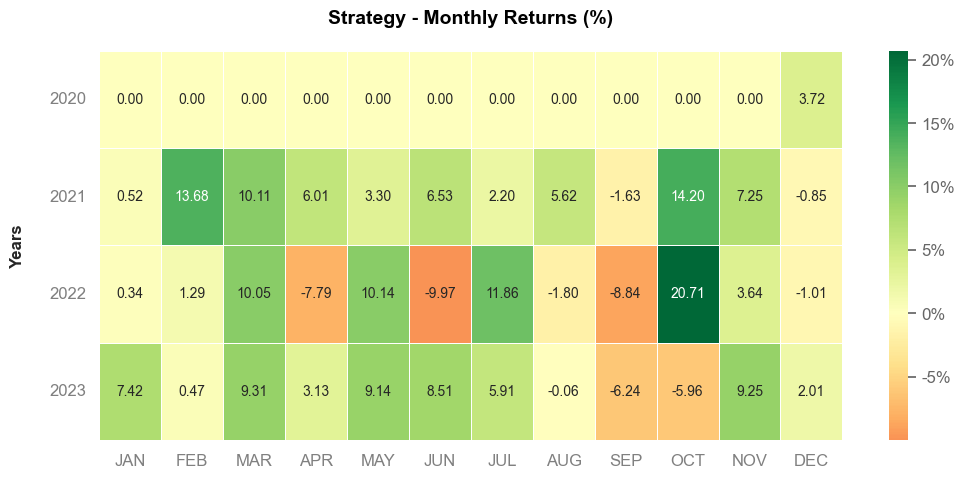

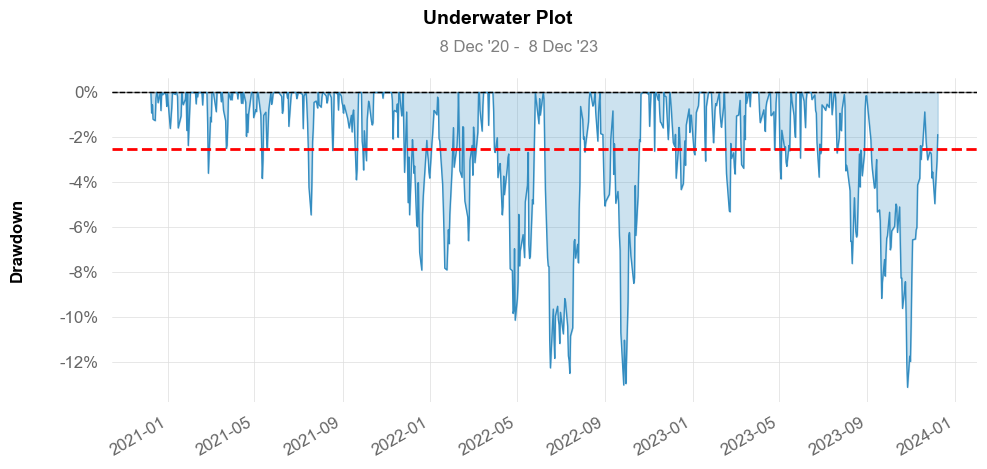

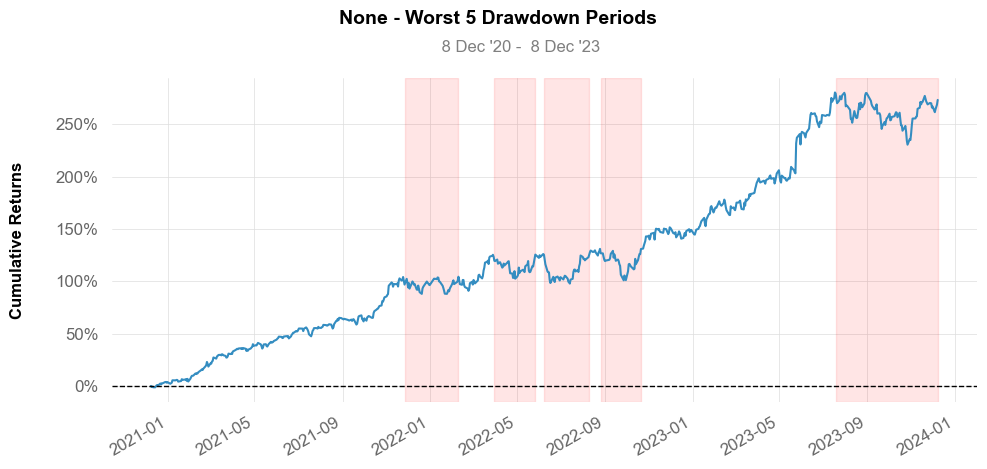

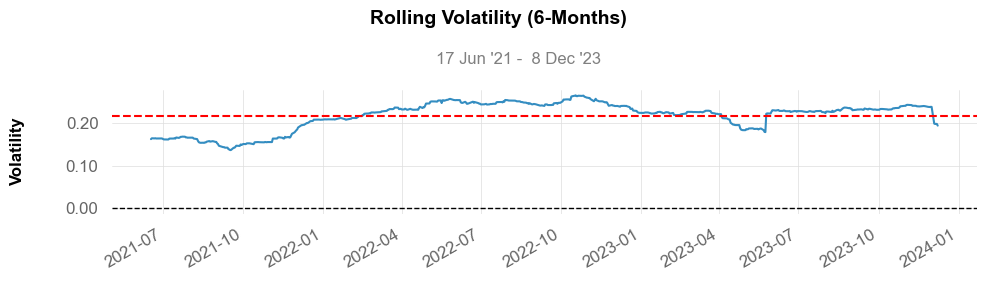

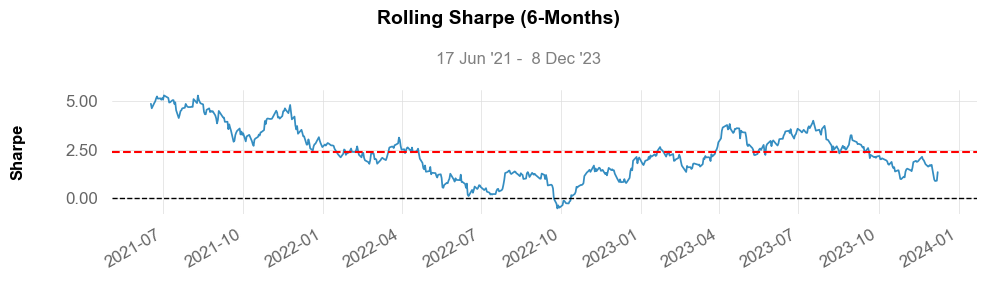

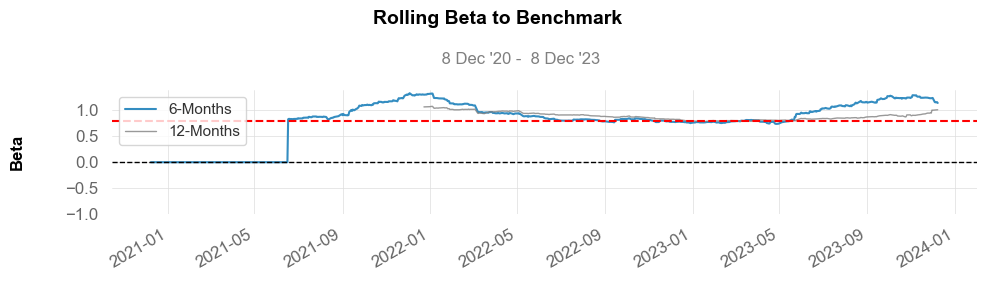

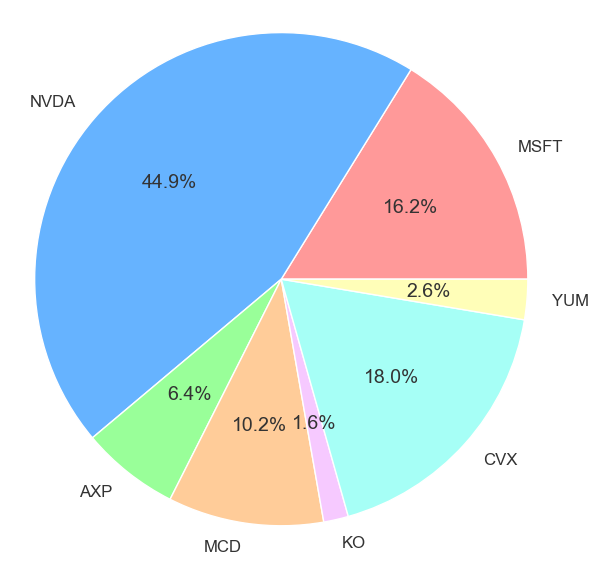

Weights acquired using EF on past 3 years of data: MSFT:0.16177, NVDA:0.44945, AXP:0.0, MCD:0.0, KO:0.06435, CVX:0.10205, YUM:0.01623


In [25]:
# getting weights using 3 years of data
portfolio=Engine(
    start_date=str(datetime.now()-timedelta(days=3*366))[:10],
    benchmark=[BENCHMARK],
    portfolio=PORTFOLIO,
    optimizer='EF',
    max_weights=0.5,
    risk_manager={
        "Stop Loss":-0.2
    },
    rebalance='monthly',
)
empyrial(portfolio)
print(f"""Weights acquired using EF on past 3 years of data: {
    ', '.join(
        [f'{stock}:{weight}' for stock, weight in zip(PORTFOLIO,portfolio.weights)]
    )
}""")

In [28]:
shares=[
    int(
        (BALANCE * weight) / price_data.iloc[-1,1]
    ) for weight, price_data in zip(
        portfolio.weights,PORTFOLIO_DATA
    )
] # round the purchase to integer shares, since fractional trading is not available on E*Trade

In [36]:
print(f'Today is {str(datetime.now())[:10]}.\nOwn '+', '.join([
    f"{share} shares of {stock}" for stock, share in zip(PORTFOLIO,shares) if share > 0
])+f'.\nEstimated annualized return: {empyrial.CAGR}')

Today is 2023-12-09.
Own 4 shares of MSFT, 9 shares of NVDA, 3 shares of KO, 3 shares of CVX, 2 shares of YUM.
Estimated annualized return: 58.56%
